<a href="https://colab.research.google.com/github/siddeshdhakar/SwinIR/blob/main/LungDiseses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# for (root,dirs,files) in os.walk('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/Paper_Dataset_Conditional/Train_Conditional', topdown=True):
#   print(len(os.listdir(str(root))))
#   print(root)
#         # print (dirs)
#         # print (files)
#         # print ('--------------------------------')

In [ ]:
# for (root,dirs,files) in os.walk('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/Paper_Dataset_Flat/Train_Flat', topdown=True):
#   print(len(os.listdir(str(root))))
#   print(root)

# Data Loading and processing

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
!unzip /content/drive/Shareddrives/Lenek_Workspace3/Data/chexp

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/train.csv')

In [ ]:

# replacing the space in column names by "_"

df.columns=df.columns.str.replace(" ","_")
print(df.columns)


Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No_Finding',
       'Enlarged_Cardiomediastinum', 'Cardiomegaly', 'Lung_Opacity',
       'Lung_Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural_Effusion', 'Pleural_Other', 'Fracture',
       'Support_Devices'],
      dtype='object')


In [ ]:
# only frontal view of chest Xrays kept

df=df.loc[df["Frontal/Lateral"]=="Frontal",:]
df.shape

(191027, 19)

In [ ]:
df_hierarchy = df.copy()

In [ ]:
df_hierarchy=df_hierarchy.fillna(0)

In [ ]:
leaf_nodes=["Cardiomegaly","Consolidation","Atelectasis","Edema","Lung_Lesion","Pneumonia"]
hierarchial_classes=["Path","Cardiomegaly","Consolidation","Atelectasis","Edema","Lung_Lesion","Pneumonia","Lung_Opacity","Enlarged_Cardiomediastinum"]

In [ ]:
# df_hierarchy=df_hierarchy.loc[(df_hierarchy["Enlarged_Cardiomediastinum"]==1) | (df_hierarchy["Lung_Opacity"]==1),l]
# df_hierarchy.shape

In [ ]:
df_hierarchy=df_hierarchy.loc[(df_hierarchy["Enlarged_Cardiomediastinum"]==1) | (df_hierarchy["Lung_Opacity"]==1) | (df_hierarchy["Enlarged_Cardiomediastinum"]==-1) | (df_hierarchy["Lung_Opacity"]==-1),hierarchial_classes]
df_hierarchy.shape

(107475, 9)

In [ ]:
df_hierarchy['Enlarged_Cardiomediastinum'].value_counts()

 0.0    88002
-1.0    10286
 1.0     9187
Name: Enlarged_Cardiomediastinum, dtype: int64

In [ ]:
df['Enlarged_Cardiomediastinum'].value_counts()

 0.0    15345
-1.0    10286
 1.0     9187
Name: Enlarged_Cardiomediastinum, dtype: int64

In [ ]:
df['Lung_Opacity'].value_counts()

 1.0    94211
 0.0     5051
-1.0     4431
Name: Lung_Opacity, dtype: int64

In [ ]:
df_hierarchy['Lung_Opacity'].value_counts()

 1.0    94211
 0.0     8833
-1.0     4431
Name: Lung_Opacity, dtype: int64

In [ ]:
df_hierarchy['Consolidation'].value_counts()

 0.0    83220
-1.0    17890
 1.0     6365
Name: Consolidation, dtype: int64

In [ ]:
df_hierarchy

,Path,Cardiomegaly,Consolidation,Atelectasis,Edema,Lung_Lesion,Pneumonia,Lung_Opacity,Enlarged_Cardiomediastinum
1,CheXpert-v1.0-small/train/patient00002/study2/...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0
12,CheXpert-v1.0-small/train/patient00007/study1/...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13,CheXpert-v1.0-small/train/patient00007/study2/...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
14,CheXpert-v1.0-small/train/patient00008/study1/...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
223405,CheXpert-v1.0-small/train/patient64534/study1/...,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
223406,CheXpert-v1.0-small/train/patient64535/study1/...,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0
223409,CheXpert-v1.0-small/train/patient64537/study2/...,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0
223410,CheXpert-v1.0-small/train/patient64537/study1/...,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0


In [ ]:
df_hierarchy=df_hierarchy.reset_index(drop=True)

In [ ]:
hierarchial_classes[1:]

['Cardiomegaly',
 'Consolidation',
 'Atelectasis',
 'Edema',
 'Lung_Lesion',
 'Pneumonia',
 'Lung_Opacity',
 'Enlarged_Cardiomediastinum']

In [ ]:
import random

In [ ]:
# df_hierarchy[hierarchial_classes[0]]

In [ ]:


policy = "ones"

for i, (index, row) in enumerate(df_hierarchy.iterrows()):
  # print("i is",i,"index is",index,"row is",row)
  for cls in hierarchial_classes[1:]:
      curr_val = row[cls]
      feat_val = 0
      if curr_val:
          curr_val = float(curr_val)
          if curr_val == 1:
              feat_val = 1
          elif curr_val == -1:
              if policy == "ones":
                  feat_val = 1
              elif policy == "mixed_one":
                  feat_val = random.uniform(0.55,0.85)
              elif policy == "mixed_zero":
                  feat_val = random.uniform(0,0.3)
              elif policy == "zeroes":
                  feat_val = 0
              # elif policy == "mixed":
              #     if cls in class_ones:
              #         feat_val = 1
              #     else:
              #         feat_val = 0
              else:
                  feat_val = 0
          else:
              feat_val = 0
      else:
          feat_val = 0

      df_hierarchy[cls][i] = feat_val

        

        


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_hierarchy

,Path,Cardiomegaly,Consolidation,Atelectasis,Edema,Lung_Lesion,Pneumonia,Lung_Opacity,Enlarged_Cardiomediastinum
0,CheXpert-v1.0-small/train/patient00002/study2/...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00007/study1/...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,CheXpert-v1.0-small/train/patient00007/study2/...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,CheXpert-v1.0-small/train/patient00008/study1/...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
107470,CheXpert-v1.0-small/train/patient64534/study1/...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
107471,CheXpert-v1.0-small/train/patient64535/study1/...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
107472,CheXpert-v1.0-small/train/patient64537/study2/...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
107473,CheXpert-v1.0-small/train/patient64537/study1/...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# df_hierarchy=df_hierarchy.loc[(df_hierarchy["Cardiomegaly"]!=-1)&(df_hierarchy["Consolidation"]!=-1)&(df_hierarchy["Pneumonia"]!=-1)
#                     &(df_hierarchy["Lung_Lesion"]!=-1)&(df_hierarchy["Edema"]!=-1)&(df_hierarchy["Atelectasis"]!=-1)& (df_hierarchy["Lung_Opacity"]!=-1) & (df_hierarchy["Enlarged_Cardiomediastinum"]!=-1),l]
# df_hierarchy=df_hierarchy.fillna(0)
# df_hierarchy=df_hierarchy.reset_index(drop=True)
# df_hierarchy.shape

In [ ]:
import random
# random.uniform(0.0, 0.3)
round(random.uniform(0,0.3), 2)

0.27

In [ ]:
df_hierarchy.shape

(107475, 9)

In [ ]:
count_e = 0
count_o = 0
count_p = 0

for i in range(df_hierarchy.shape[0]):

  if (df_hierarchy['Cardiomegaly'][i] == 1.0):
    df_hierarchy['Enlarged_Cardiomediastinum'][i] = 1.0
    count_e +=1


  if (df_hierarchy['Consolidation'][i] == 1.0) | (df_hierarchy['Edema'][i] == 1.0) | (df_hierarchy['Atelectasis'][i] == 1.0) | (df_hierarchy['Lung_Lesion'][i] == 1.0) | (df_hierarchy['Pneumonia'][i] == 1.0):
    df_hierarchy['Lung_Opacity'][i] = 1.0
    count_o +=1

  if (df_hierarchy['Pneumonia'][i] == 1.0):
    df_hierarchy['Consolidation'][i] = 1.0
    count_p += 1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print(count_e,count_o,count_p)

16546 75850 17249


In [ ]:
df_hierarchy['Enlarged_Cardiomediastinum'].value_counts()

0.0    73856
1.0    33619
Name: Enlarged_Cardiomediastinum, dtype: int64

In [ ]:
df_hierarchy['Lung_Opacity'].value_counts()

1.0    102950
0.0      4525
Name: Lung_Opacity, dtype: int64

In [ ]:
df_hierarchy['Consolidation'].value_counts()

0.0    68606
1.0    38869
Name: Consolidation, dtype: int64

In [ ]:
df_hierarchy['Pneumonia'].value_counts()

0.0    90226
1.0    17249
Name: Pneumonia, dtype: int64

In [ ]:
df_hierarchy['Edema'].value_counts()

0.0    69634
1.0    37841
Name: Edema, dtype: int64

In [ ]:
df_hierarchy['Atelectasis'].value_counts()

0.0    68679
1.0    38796
Name: Atelectasis, dtype: int64

In [ ]:
df_hierarchy['Lung_Lesion'].value_counts()

0.0    102120
1.0      5355
Name: Lung_Lesion, dtype: int64

In [ ]:
# df_hierarchy

In [ ]:
# df_valid=pd.read_csv("/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/valid.csv")

In [ ]:
# df_valid.shape

In [ ]:
df_valid=pd.read_csv("/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/valid.csv")
df_valid.columns=df_valid.columns.str.replace(" ","_")
df_valid=df_valid.loc[df_valid["Frontal/Lateral"]=="Frontal",:]
print([df_valid[x].value_counts() for x in hierarchial_classes[1:]])
# temp1=df_valid.loc[(df_valid["Enlarged_Cardiomediastinum"]==1) | (df_valid["Lung_Opacity"]==1),hierarchial_classes]
# temp1=df_valid.loc[(df_valid["Enlarged_Cardiomediastinum"]!= None) | (df_valid["Lung_Opacity"]!=None),hierarchial_classes]
# df_valid_heirarchy=temp1.loc[(temp1["Cardiomegaly"]!=-1)&(temp1["Consolidation"]!=-1)&(temp1["Pneumonia"]!=-1)&(temp1["Lung_Lesion"]!=-1)&(temp1["Edema"]!=-1)&(temp1["Atelectasis"]!=-1) & (temp1["Lung_Opacity"]!=-1) & (temp1["Enlarged_Cardiomediastinum"]!=-1),hierarchial_classes]
df_valid_heirarchy=df_valid[hierarchial_classes]
df_valid_heirarchy=df_valid_heirarchy.fillna(0)
df_valid_heirarchy=df_valid_heirarchy.reset_index(drop=True)
df_valid_heirarchy.shape

[0.0    136
1.0     66
Name: Cardiomegaly, dtype: int64, 0.0    170
1.0     32
Name: Consolidation, dtype: int64, 0.0    127
1.0     75
Name: Atelectasis, dtype: int64, 0.0    160
1.0     42
Name: Edema, dtype: int64, 0.0    201
1.0      1
Name: Lung_Lesion, dtype: int64, 0.0    194
1.0      8
Name: Pneumonia, dtype: int64, 1.0    117
0.0     85
Name: Lung_Opacity, dtype: int64, 1.0    105
0.0     97
Name: Enlarged_Cardiomediastinum, dtype: int64]


(202, 9)

In [ ]:
df_valid_heirarchy.head()

,Path,Cardiomegaly,Consolidation,Atelectasis,Edema,Lung_Lesion,Pneumonia,Lung_Opacity,Enlarged_Cardiomediastinum
0,CheXpert-v1.0-small/valid/patient64541/study1/...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0-small/valid/patient64543/study1/...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,CheXpert-v1.0-small/valid/patient64544/study1/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64545/study1/...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
df_hierarchy.head()

,Path,Cardiomegaly,Consolidation,Atelectasis,Edema,Lung_Lesion,Pneumonia,Lung_Opacity,Enlarged_Cardiomediastinum
0,CheXpert-v1.0-small/train/patient00002/study2/...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00007/study1/...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,CheXpert-v1.0-small/train/patient00007/study2/...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,CheXpert-v1.0-small/train/patient00008/study1/...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# for column in df_hierarchy.columns[1:]:
#   print(column)
#   df_hierarchy[column] = df_hierarchy[column].astype('int')

In [ ]:
# for column in df_valid_heirarchy.columns[1:]:
#   print(column)
#   df_valid_heirarchy[column] = df_valid_heirarchy[column].astype('int')

# MLSMOTE

In [ ]:
# -*- coding: utf-8 -*-
# Importing required Library
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

def create_dataset(n_sample=1000):
    ''' 
    Create a unevenly distributed sample data set multilabel  
    classification using make_classification function
    
    args
    nsample: int, Number of sample to be created
    
    return
    X: pandas.DataFrame, feature vector dataframe with 10 features 
    y: pandas.DataFrame, target vector dataframe with 5 labels
    '''
    X, y = make_classification(n_classes=5, class_sep=2, 
                           weights=[0.1,0.025, 0.205, 0.008, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=10, n_clusters_per_class=1, n_samples=1000, random_state=10)
    y = pd.get_dummies(y, prefix='class')
    return pd.DataFrame(X), y

def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe
    
    args
    df: pandas.DataFrame, target label df whose tail label has to identified
    
    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified
    
  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels
    
    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe
    
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target

if __name__=='main':
    """
    main function to use the MLSMOTE
    """
    X, y = create_dataset()                     #Creating a Dataframe
    X_sub, y_sub = get_minority_instace(X, y)   #Getting minority instance of that datframe
    X_res,y_res =MLSMOTE(X_sub, y_sub, 100)     #Applying MLSMOTE to augment the dataframe

# Data preparation and Model

In [ ]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [ ]:
# from tensorflow.keras.applications import * #Efficient Net included here
# from tensorflow.keras import models
# from tensorflow.keras import layers
# from keras.preprocessing.image import ImageDataGenerator
# import os
# import shutil
# import pandas as pd
# from sklearn import model_selection
# from tqdm import tqdm
# from tensorflow.keras import optimizers
# import tensorflow as tf

In [ ]:
# columns = ["No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion","Edema", "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices"]
# columns = l[1:]
# df_hierarchy["CombinedColumns"] = df_hierarchy[columns].apply(lambda x: x.tolist(), axis=1)

# train_generator= datagen.flow_from_dataframe(
#     dataframe=df_hierarchy,
#     directory=None,
#     x_col='Path',
#     y_col="CombinedColumns",
#     batch_size=64,
#     seed=42,
#     shuffle=True,
#     target_size=(224, 224))

In [ ]:
# df_hierarchy

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                           horizontal_flip=True,
                           validation_split=0.20)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=df_hierarchy,
directory=None,
x_col="Path",
y_col=hierarchial_classes[1:],
subset="training",
batch_size=64,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(224,224))

Found 85980 validated image filenames.


In [ ]:
valid_generator=datagen.flow_from_dataframe(
dataframe=df_hierarchy,
directory=None,
x_col="Path",
y_col=hierarchial_classes[1:],
subset="validation",
batch_size=64,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(224,224))


Found 21495 validated image filenames.


In [ ]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=df_valid_heirarchy,
directory=None,
x_col="Path",
y_col=hierarchial_classes[1:],
batch_size=1,
# seed=42,
shuffle=False,
class_mode="raw",
target_size=(224,224))

Found 202 validated image filenames.


In [ ]:
test_generator.n

202

In [ ]:
# conv_base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# conv_base.summary()

In [ ]:
# model = models.Sequential()
# model.add(conv_base)

# model.add(layers.GlobalMaxPooling2D(name="gap"))

# #avoid overfitting
# model.add(layers.Dropout(rate=0.2, name="dropout_out"))

# # Set NUMBER_OF_CLASSES to the number of your final predictions.
# model.add(layers.Dense(8, activation="softmax", name="fc_out"))

# # set trainable to True
# conv_base.trainable = True

In [ ]:
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 8)                 10248     
                                                                 
Total params: 4,059,819
Trainable params: 4,017,796
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
# base_model = DenseNet121(include_top= False, input_shape=(224,224,3), weights='imagenet')
#   # base_model = tf.keras.applications.EfficientNetB0(include_top= False, input_shape=(image_size,image_size,3), weights='imagenet')

#   # add a global spatial average pooling layer
#   x = base_model.output
#   x = GlobalAveragePooling2D(input_shape=(1024,1,1))(x)
#   # Add a flattern layer 
#   x = Dense(2048, activation='relu')(x)
#   x = BatchNormalization()(x)
#   x = Dropout(0.2)(x)
#   # Add a fully-connected layer
#   x = Dense(512, activation='relu')(x)
#   x = BatchNormalization()(x)
#   x = Dropout(0.2)(x)
#   # and a logistic layer --  we have 5 classes
#   predictions = Dense(8, activation='sigmoid')(x)
  
#   # this is the model we will train
#   model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# base_model = DenseNet121(include_top= False, input_shape=(224,224,3), weights='imagenet')
base_model = tf.keras.applications.EfficientNetB0(include_top= False, input_shape=(224,224,3), weights='imagenet')

# add a global spatial average pooling layer
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D(input_shape=(1280,1,1))(x)
# Add a flattern layer 
x = tf.keras.layers.Dense(2560, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a fully-connected layer
x = tf.keras.layers.Dense(640, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
# and a logistic layer --  we have 5 classes
predictions = tf.keras.layers.Dense(8, activation='sigmoid')(x)

# this is the model we will train
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

In [ ]:
early=tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=3,restore_best_weights=True)

learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list=[early, learning_rate_reduction]

In [ ]:

model.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["accuracy",tf.keras.metrics.AUC(from_logits=True)]
    )


In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 5.8 MB 16.7 MB/s 
     |████████████████████████████████| 462 kB 61.3 MB/s 
     |████████████████████████████████| 1.4 MB 50.8 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 6s (68.1 MB/s)
(Reading database ... 155676 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155654 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [ ]:
# EfficientNetB0 zeroes

history = model.fit(train_generator, 
          epochs=50,
          validation_data=valid_generator, 
          callbacks=callbacks_list)



Epoch 1/50
1344/1344 [==============================] - 666s 480ms/step - loss: 0.3542 - accuracy: 0.4153 - auc: 0.8536 - val_loss: 0.3667 - val_accuracy: 0.4221 - val_auc: 0.8208 - lr: 0.0010
Epoch 2/50
1344/1344 [==============================] - 619s 460ms/step - loss: 0.3169 - accuracy: 0.4251 - auc: 0.8800 - val_loss: 0.4074 - val_accuracy: 0.4221 - val_auc: 0.8157 - lr: 0.0010
Epoch 3/50
1344/1344 [==============================] - 620s 461ms/step - loss: 0.3118 - accuracy: 0.4258 - auc: 0.8838 - val_loss: 0.3632 - val_accuracy: 0.4221 - val_auc: 0.8440 - lr: 0.0010
Epoch 4/50
1344/1344 [==============================] - 618s 460ms/step - loss: 0.3066 - accuracy: 0.4260 - auc: 0.8879 - val_loss: 0.3916 - val_accuracy: 0.4219 - val_auc: 0.7369 - lr: 0.0010
Epoch 5/50
1344/1344 [==============================] - ETA: 0s - loss: 0.3038 - accuracy: 0.4259 - auc: 0.8899
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1344/1344 [=============================

In [ ]:
# EfficientNetB0 ones

history = model.fit(train_generator, 
          epochs=50,
          validation_data=valid_generator, 
          callbacks=callbacks_list)



Epoch 1/50
1344/1344 [==============================] - 632s 461ms/step - loss: 0.4835 - accuracy: 0.2193 - auc_2: 0.8077 - val_loss: 0.5163 - val_accuracy: 0.2214 - val_auc_2: 0.7643 - lr: 0.0010
Epoch 2/50
1344/1344 [==============================] - 617s 459ms/step - loss: 0.4507 - accuracy: 0.2216 - auc_2: 0.8333 - val_loss: 0.5766 - val_accuracy: 0.2214 - val_auc_2: 0.7156 - lr: 0.0010
Epoch 3/50
1344/1344 [==============================] - ETA: 0s - loss: 0.4399 - accuracy: 0.2224 - auc_2: 0.8406
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1344/1344 [==============================] - 618s 460ms/step - loss: 0.4399 - accuracy: 0.2224 - auc_2: 0.8406 - val_loss: 0.7107 - val_accuracy: 0.2214 - val_auc_2: 0.7559 - lr: 0.0010
Epoch 4/50
1344/1344 [==============================] - 617s 459ms/step - loss: 0.4228 - accuracy: 0.2241 - auc_2: 0.8536 - val_loss: 0.5135 - val_accuracy: 0.2214 - val_auc_2: 0.7732 - lr: 3.0000e-04
Epoch 5/50
1344/1344 [=======

In [ ]:
# EfficientNetB0 zeroes+LSR

history = model.fit(train_generator, 
          epochs=50,
          validation_data=valid_generator, 
          callbacks=callbacks_list)



Epoch 1/50
1344/1344 [==============================] - 640s 467ms/step - loss: 0.3794 - accuracy: 0.4271 - auc_1: 0.7854 - val_loss: 0.4358 - val_accuracy: 0.4362 - val_auc_1: 0.7408 - lr: 0.0010
Epoch 2/50
1344/1344 [==============================] - 623s 463ms/step - loss: 0.3418 - accuracy: 0.4370 - auc_1: 0.8188 - val_loss: 77.9873 - val_accuracy: 0.4362 - val_auc_1: 0.6874 - lr: 0.0010
Epoch 3/50
1344/1344 [==============================] - 626s 466ms/step - loss: 0.3339 - accuracy: 0.4376 - auc_1: 0.8261 - val_loss: 0.3920 - val_accuracy: 0.4362 - val_auc_1: 0.7433 - lr: 0.0010
Epoch 4/50
1344/1344 [==============================] - 627s 467ms/step - loss: 0.3300 - accuracy: 0.4377 - auc_1: 0.8300 - val_loss: 0.9947 - val_accuracy: 0.4362 - val_auc_1: 0.7266 - lr: 0.0010
Epoch 5/50
1344/1344 [==============================] - ETA: 0s - loss: 0.3280 - accuracy: 0.4382 - auc_1: 0.8313
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1344/1344 [==========

In [ ]:
# EfficientNetB0 ones+LSR

history = model.fit(train_generator, 
          epochs=50,
          validation_data=valid_generator, 
          callbacks=callbacks_list)



Epoch 1/50
1344/1344 [==============================] - 681s 488ms/step - loss: 0.4457 - accuracy: 0.4252 - auc: 0.8047 - val_loss: 6.8599 - val_accuracy: 0.2306 - val_auc: 0.6354 - lr: 0.0010
Epoch 2/50
1344/1344 [==============================] - 625s 465ms/step - loss: 0.4101 - accuracy: 0.4365 - auc: 0.8338 - val_loss: 1.6521 - val_accuracy: 0.1931 - val_auc: 0.6832 - lr: 0.0010
Epoch 3/50
1344/1344 [==============================] - 625s 465ms/step - loss: 0.4133 - accuracy: 0.4367 - auc: 0.8288 - val_loss: 0.4464 - val_accuracy: 0.4360 - val_auc: 0.7892 - lr: 0.0010
Epoch 4/50
1344/1344 [==============================] - 626s 466ms/step - loss: 0.4080 - accuracy: 0.4369 - auc: 0.8331 - val_loss: 0.5360 - val_accuracy: 0.4360 - val_auc: 0.7624 - lr: 0.0010
Epoch 5/50
1344/1344 [==============================] - ETA: 0s - loss: 0.4083 - accuracy: 0.4367 - auc: 0.8319
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1344/1344 [=============================

In [ ]:
# EfficientNetB0 + ignore

history = model.fit(train_generator, 
          epochs=50,
          validation_data=valid_generator, 
          callbacks=callbacks_list)



Epoch 1/50
696/696 [==============================] - 358s 484ms/step - loss: 0.3887 - accuracy: 0.3692 - auc: 0.8428 - val_loss: 0.5507 - val_accuracy: 0.3077 - val_auc: 0.7497 - lr: 0.0010
Epoch 2/50
696/696 [==============================] - 320s 460ms/step - loss: 0.3335 - accuracy: 0.3857 - auc: 0.8794 - val_loss: 2.9627 - val_accuracy: 0.0023 - val_auc: 0.5597 - lr: 0.0010
Epoch 3/50
696/696 [==============================] - 319s 458ms/step - loss: 0.3215 - accuracy: 0.3864 - auc: 0.8882 - val_loss: 0.3868 - val_accuracy: 0.3876 - val_auc: 0.8236 - lr: 0.0010
Epoch 4/50
696/696 [==============================] - 319s 458ms/step - loss: 0.3194 - accuracy: 0.3870 - auc: 0.8912 - val_loss: 0.7669 - val_accuracy: 0.0461 - val_auc: 0.6608 - lr: 0.0010
Epoch 5/50
696/696 [==============================] - ETA: 0s - loss: 0.3145 - accuracy: 0.3878 - auc: 0.8936
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
696/696 [==============================] - 319s 45

In [ ]:
# DenseNet121

history = model.fit(train_generator, 
          epochs=50,
          validation_data=valid_generator, 
          callbacks=callbacks_list)



Epoch 1/50
696/696 [==============================] - 309s 409ms/step - loss: 0.3976 - accuracy: 0.3691 - auc: 0.8322 - val_loss: 0.4004 - val_accuracy: 0.3876 - val_auc: 0.8327 - lr: 0.0010
Epoch 2/50
696/696 [==============================] - 265s 381ms/step - loss: 0.3580 - accuracy: 0.3849 - auc: 0.8555 - val_loss: 4.7328 - val_accuracy: 0.1999 - val_auc: 0.6179 - lr: 0.0010
Epoch 3/50
696/696 [==============================] - 265s 380ms/step - loss: 0.3511 - accuracy: 0.3849 - auc: 0.8609 - val_loss: 0.3498 - val_accuracy: 0.3870 - val_auc: 0.8626 - lr: 0.0010
Epoch 4/50
696/696 [==============================] - 265s 380ms/step - loss: 0.3509 - accuracy: 0.3846 - auc: 0.8605 - val_loss: 0.4330 - val_accuracy: 0.3876 - val_auc: 0.7263 - lr: 0.0010
Epoch 5/50
696/696 [==============================] - ETA: 0s - loss: 0.3568 - accuracy: 0.3849 - auc: 0.8519
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
696/696 [==============================] - 264s 38

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc', 'lr'])

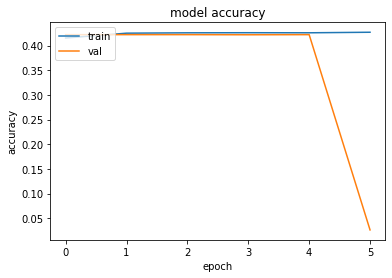

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = '/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/json/Efficient_conditional_zeroes.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)


In [ ]:
model.save('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_Efficient_conditional_zeroes.h5')

In [ ]:
# model.save('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_DenseNet_conditional.h5')

In [ ]:

import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_Efficient_conditional_zeroes.h5')


In [ ]:
model.input,model.output

(<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_2')>)

In [ ]:
import cv2
img = cv2.imread('/content/Tuberculosis.jpg')
img = img


In [ ]:
img = cv2.resize(img,(224,224)) 

In [ ]:
img = img.reshape(1,224,224,3)

In [ ]:
# model = tf.keras.Model(inputs=model.input, outputs=model.output)

In [ ]:
# test_generator.reset()
y_pred_keras = model.predict(img)

In [ ]:
# y_labels = test_generator.get_classes(df_valid_heirarchy,l[1:])


In [ ]:
y_pred_keras.shape

(202, 8)

In [ ]:
y_labels = np.array(df_valid_heirarchy.iloc[:,1:])

In [ ]:

y_labels.shape

(202, 8)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=hierarchial_classes[1:][ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Efficient Net Zeroes')
plt.legend(loc='best')
plt.show()


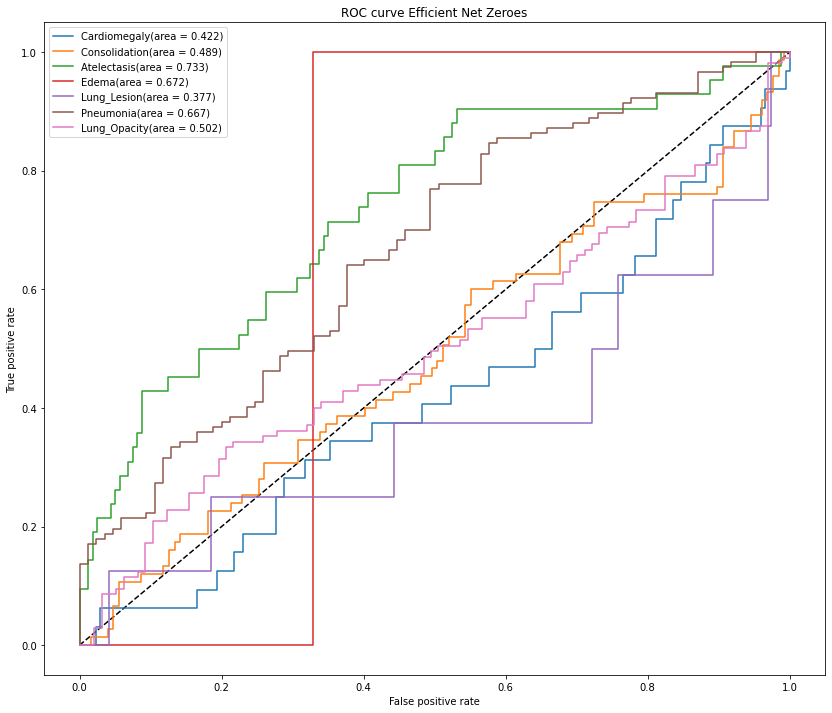

In [ ]:

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=hierarchial_classes[1:][ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Efficient Net Zeroes')
plt.legend(loc='best')
plt.show()


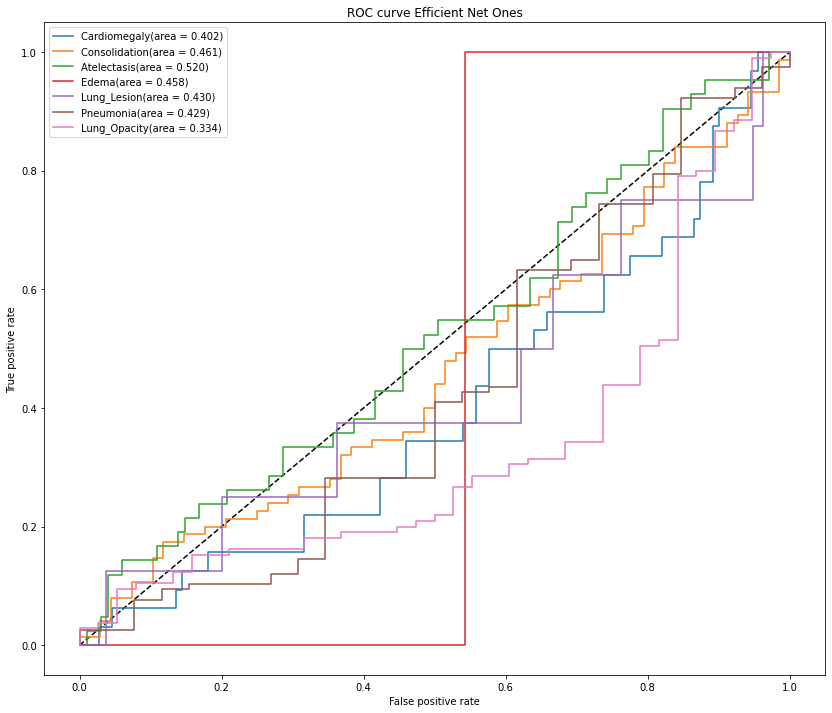

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=hierarchial_classes[1:][ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Efficient Net Ones')
plt.legend(loc='best')
plt.show()

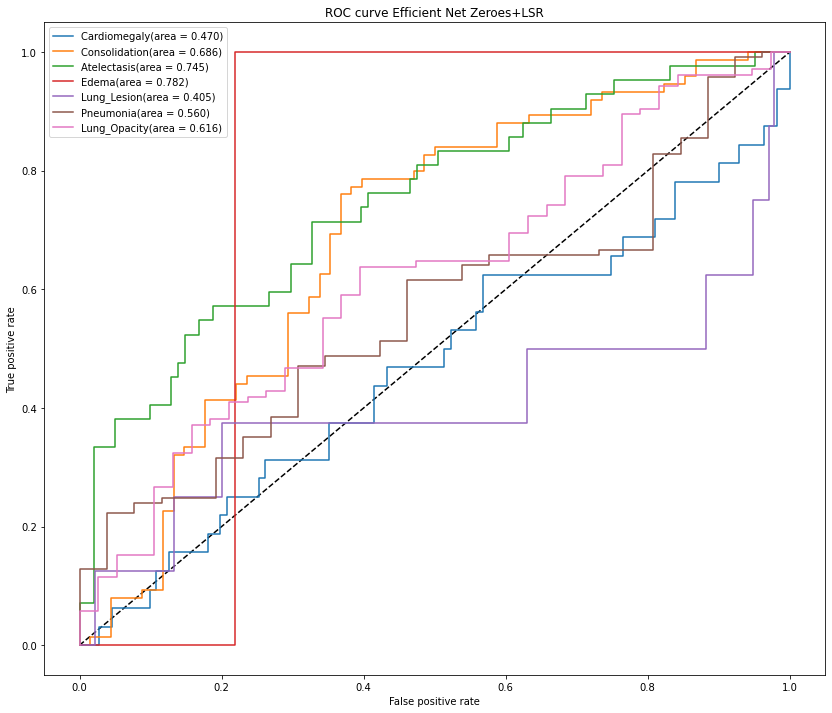

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=hierarchial_classes[1:][ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Efficient Net Zeroes+LSR')
plt.legend(loc='best')
plt.show()

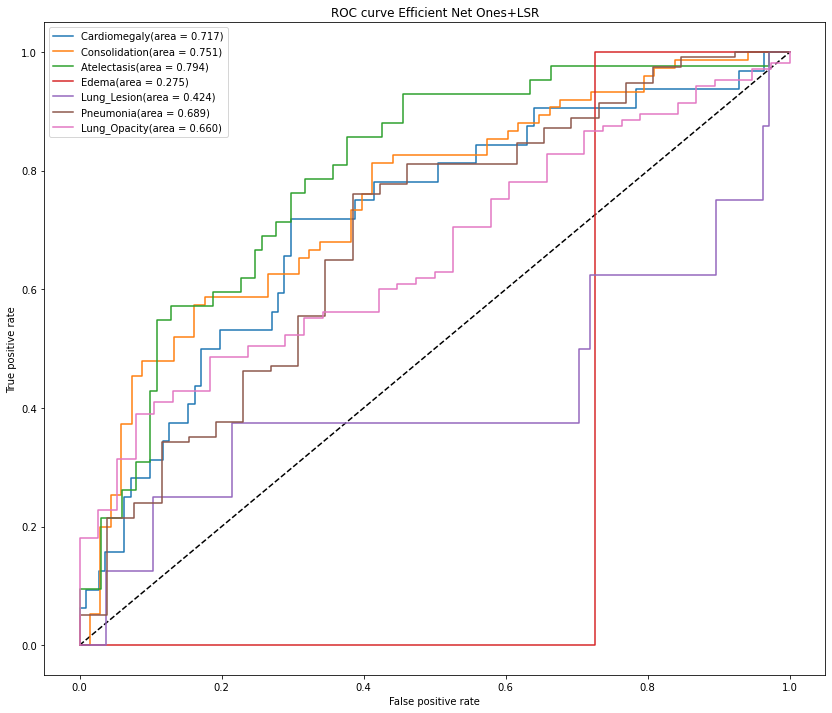

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=hierarchial_classes[1:][ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Efficient Net Ones+LSR')
plt.legend(loc='best')
plt.show()

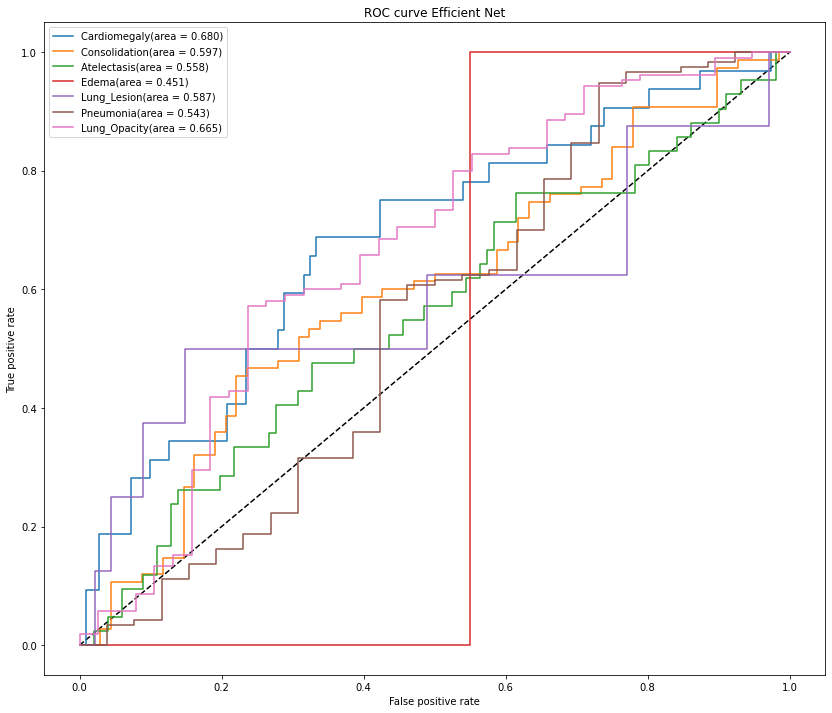

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=l[1:][ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Efficient Net')
plt.legend(loc='best')
plt.show()

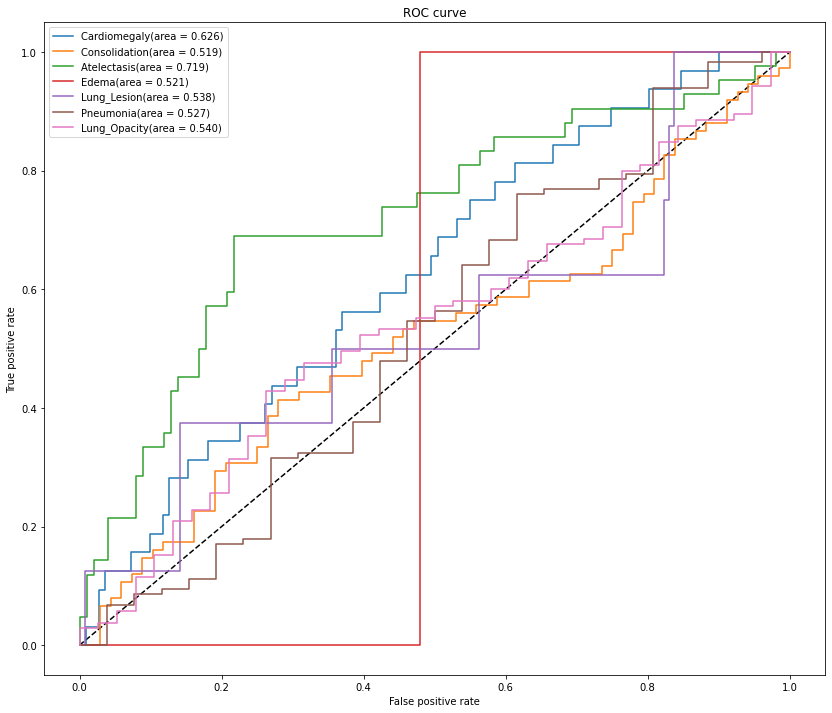

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=l[1:][ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Densenet')
plt.legend(loc='best')
plt.show()
    

# Ensemble AUC on conditional set

In [ ]:
df_valid=pd.read_csv("/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/valid.csv")
df_valid.columns=df_valid.columns.str.replace(" ","_")
df_valid=df_valid.loc[df_valid["Frontal/Lateral"]=="Frontal",:]
print([df_valid[x].value_counts() for x in hierarchial_classes[1:]])
temp1=df_valid.loc[(df_valid["Enlarged_Cardiomediastinum"]==1) | (df_valid["Lung_Opacity"]==1),hierarchial_classes]
# temp1=df_valid.loc[(df_valid["Enlarged_Cardiomediastinum"]!= None) | (df_valid["Lung_Opacity"]!=None),hierarchial_classes]
df_valid_heirarchy=temp1.loc[(temp1["Cardiomegaly"]!=-1)&(temp1["Consolidation"]!=-1)&(temp1["Pneumonia"]!=-1)&(temp1["Lung_Lesion"]!=-1)&(temp1["Edema"]!=-1)&(temp1["Atelectasis"]!=-1) & (temp1["Lung_Opacity"]!=-1) & (temp1["Enlarged_Cardiomediastinum"]!=-1),hierarchial_classes]
df_valid_heirarchy=df_valid_heirarchy[hierarchial_classes]
df_valid_heirarchy=df_valid_heirarchy.fillna(0)
df_valid_heirarchy=df_valid_heirarchy.reset_index(drop=True)
df_valid_heirarchy.shape

[0.0    136
1.0     66
Name: Cardiomegaly, dtype: int64, 0.0    170
1.0     32
Name: Consolidation, dtype: int64, 0.0    127
1.0     75
Name: Atelectasis, dtype: int64, 0.0    160
1.0     42
Name: Edema, dtype: int64, 0.0    201
1.0      1
Name: Lung_Lesion, dtype: int64, 0.0    194
1.0      8
Name: Pneumonia, dtype: int64, 1.0    117
0.0     85
Name: Lung_Opacity, dtype: int64, 1.0    105
0.0     97
Name: Enlarged_Cardiomediastinum, dtype: int64]


(143, 9)

In [ ]:
hierarchial_classes

['Path',
 'Cardiomegaly',
 'Consolidation',
 'Atelectasis',
 'Edema',
 'Lung_Lesion',
 'Pneumonia',
 'Lung_Opacity',
 'Enlarged_Cardiomediastinum']

In [ ]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=df_valid_heirarchy,
directory=None,
x_col="Path",
y_col=hierarchial_classes[1:],
# batch_size=1,
# seed=42,
shuffle=False,
class_mode="raw",
target_size=(224,224))

Found 143 validated image filenames.


In [ ]:
test_generator.reset()
y_pred_keras = model.predict(test_generator,verbose = 1,steps=test_generator.n)

In [ ]:
y_labels = np.array(df_valid_heirarchy.iloc[:,1:])

In [ ]:
model_ignore = tf.keras.models.load_model('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_Efficient_conditional_ignore.h5')
model_ones = tf.keras.models.load_model('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_Efficient_conditional_ones.h5')
model_zeroes = tf.keras.models.load_model('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_Efficient_conditional_zeroes.h5')
model_onesLSR = tf.keras.models.load_model('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_Efficient_conditional_onesLSR.h5')
model_zeroesLSR = tf.keras.models.load_model('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_Efficient_conditional_zeroesLSR.h5')

In [ ]:
model_ignore.input,model_ignore.output

(<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_7')>,
 <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_12')>)

In [ ]:
test_generator.reset()
y1 = model_ignore.predict(test_generator,verbose = 1,steps=test_generator.n)

test_generator.reset()
y2 = model_ones.predict(test_generator,verbose = 1,steps=test_generator.n)

test_generator.reset()
y3 = model_zeroes.predict(test_generator,verbose = 1,steps=test_generator.n)

test_generator.reset()
y4 = model_onesLSR.predict(test_generator,verbose = 1,steps=test_generator.n)

test_generator.reset()
y5 = model_zeroesLSR.predict(test_generator,verbose = 1,steps=test_generator.n)

  5/143 [>.............................] - ETA: 25s

  5/143 [>.............................] - ETA: 9s 

  5/143 [>.............................] - ETA: 10s

  5/143 [>.............................] - ETA: 9s 

  5/143 [>.............................] - ETA: 10s

143/143 [==============================] - 0s 2ms/step


In [ ]:
y_pred_keras = (y1+y2+y3+y4+y5)/5.

In [ ]:
y_pred_keras = 0.1*y1 + 0.25*y2 + 0.15*y3 + 0.30*y4 *0.2*y5

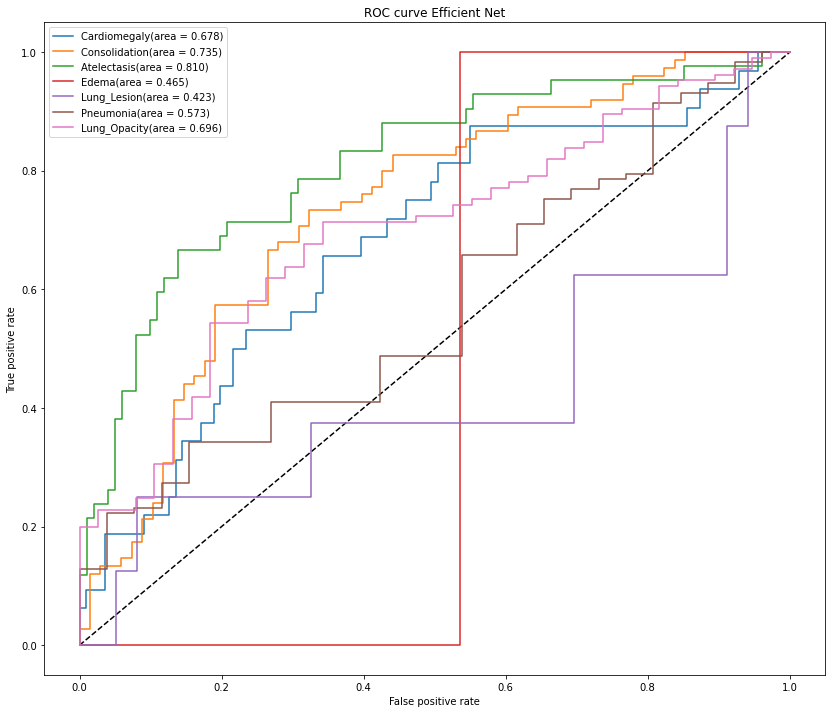

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=hierarchial_classes[1:][ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Efficient Net')
plt.legend(loc='best')
plt.show()

# Plot hidden layer output

In [ ]:
model  = tf.keras.models.load_model('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_Efficient_conditional.h5')

In [ ]:
model.summary()

In [ ]:
image = cv2.imread('/content/Tuberculosis.jpg')

In [ ]:
image = image/255.

In [ ]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
image.reshape(1,224,224,3).shape

(1, 224, 224, 3)

In [ ]:
model.layers[-15:]

In [ ]:
def visualize_conv_layer(layer_name,image):
  
  layer_output=model.get_layer(layer_name).output

  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)

  intermediate_prediction=intermediate_model.predict(image.reshape(1,224,224,3))
  
  row_size=8
  col_size=8
  
  img_index=0

  print(np.shape(intermediate_prediction))
  plt.figure(figsize = (14,12))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

      img_index=img_index+1

(1, 7, 7, 1280)


<Figure size 1008x864 with 0 Axes>

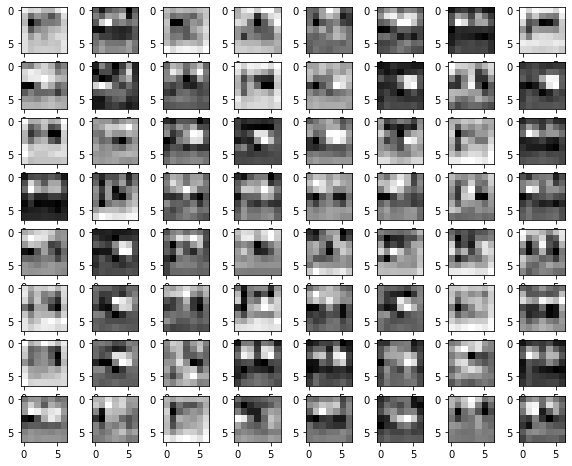

In [ ]:
visualize_conv_layer('top_conv',image)

In [ ]:
model_train.summary()

(1, 7, 7, 1280)


<Figure size 1008x864 with 0 Axes>

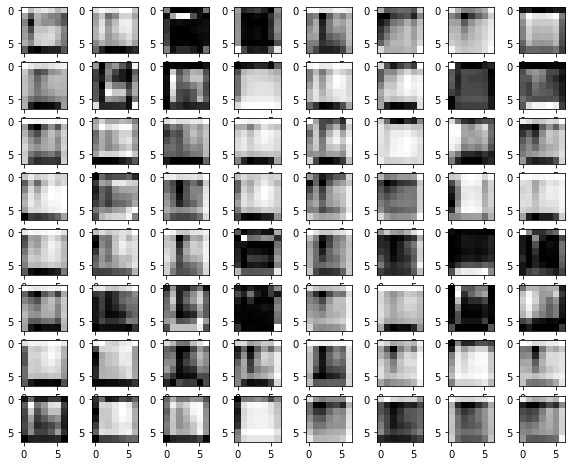

In [ ]:
visualize_conv_layer('top_activation',image)

# Flat

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/train.csv')
df.shape

(223414, 19)

In [ ]:
df.columns=df.columns.str.replace(" ","_")

In [ ]:
df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No_Finding',
       'Enlarged_Cardiomediastinum', 'Cardiomegaly', 'Lung_Opacity',
       'Lung_Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural_Effusion', 'Pleural_Other', 'Fracture',
       'Support_Devices'],
      dtype='object')

In [ ]:
df=df.loc[df["Frontal/Lateral"]=="Frontal",:]
df.shape

(191027, 19)

In [ ]:
flat_classes = ['Path','Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural_Effusion']

In [ ]:
# df_flat=df[~df.eq(-1).any(1)]
# df_flat.shape

In [ ]:
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No_Finding,Enlarged_Cardiomediastinum,Cardiomegaly,Lung_Opacity,Lung_Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural_Effusion,Pleural_Other,Fracture,Support_Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
df_flat = df.copy()

In [ ]:
df_flat=df_flat.reset_index(drop=True)

In [ ]:
df_flat = df_flat[flat_classes]

In [ ]:
import random

policy = "mixed_one"

for i, (index, row) in enumerate(df_flat.iterrows()):
  # print("i is",i,"index is",index,"row is",row)
  for cls in flat_classes[1:]:
      curr_val = row[cls]
      feat_val = 0
      if curr_val:
          curr_val = float(curr_val)
          if curr_val == 1:
              feat_val = 1
          elif curr_val == -1:
              if policy == "ones":
                  feat_val = 1
              elif policy == "mixed_one":
                  feat_val = random.uniform(0.55,0.85)
              elif policy == "mixed_zero":
                  feat_val = random.uniform(0,0.3)
              elif policy == "zeroes":
                  feat_val = 0
              # elif policy == "mixed":
              #     if cls in class_ones:
              #         feat_val = 1
              #     else:
              #         feat_val = 0
              else:
                  feat_val = 0
          else:
              feat_val = 0
      else:
          feat_val = 0

      df_flat[cls][i] = feat_val

        


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_flat

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural_Effusion
0,CheXpert-v1.0-small/train/patient00001/study1/...,0.000000,0.000000,0.000000,0.000000,0.000000
1,CheXpert-v1.0-small/train/patient00002/study2/...,0.589769,0.619881,0.747156,0.789241,0.627015
2,CheXpert-v1.0-small/train/patient00002/study1/...,0.000000,0.000000,0.565295,0.000000,0.000000
3,CheXpert-v1.0-small/train/patient00003/study1/...,0.000000,0.000000,0.000000,1.000000,0.000000
4,CheXpert-v1.0-small/train/patient00004/study1/...,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
191022,CheXpert-v1.0-small/train/patient64537/study2/...,0.616875,0.000000,0.000000,0.000000,1.000000
191023,CheXpert-v1.0-small/train/patient64537/study1/...,0.586843,0.000000,0.000000,0.000000,0.689556
191024,CheXpert-v1.0-small/train/patient64538/study1/...,0.000000,0.000000,0.000000,0.747373,0.000000
191025,CheXpert-v1.0-small/train/patient64539/study1/...,1.000000,1.000000,0.000000,0.000000,0.000000


In [ ]:
# df_flat=df_flat.drop(["Sex","Age","Frontal/Lateral","AP/PA"],axis=1)
# df_flat.head()

,Path,No_Finding,Enlarged_Cardiomediastinum,Cardiomegaly,Lung_Opacity,Lung_Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural_Effusion,Pleural_Other,Fracture,Support_Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,CheXpert-v1.0-small/train/patient00004/study1/...,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7,CheXpert-v1.0-small/train/patient00005/study1/...,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0
9,CheXpert-v1.0-small/train/patient00005/study2/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
df_flat=df_flat.fillna(0)
df_flat=df_flat.reset_index(drop=True)
df_flat.shape  

(191027, 19)

In [ ]:
len(df_flat.columns[1:])

5

In [ ]:
# for column in df_flat.columns[1:]:
#   print(column)
#   df_flat[column] = df_flat[column].astype('int')

In [ ]:
# similar steps for Validation data

df_test = pd.read_csv('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/valid.csv')
df_test.columns=df_test.columns.str.replace(" ","_")
df_test=df_test.loc[df_test["Frontal/Lateral"]=="Frontal",:]
df_test=df_test.fillna(0)
df_test = df_test[flat_classes]
df_test=df_test.reset_index(drop=True)
df
df_test.shape

(202, 6)

In [ ]:
# for column in flat_valid.columns[1:]:
#   print(column)
#   flat_valid[column] = flat_valid[column].astype('int')

# Flat model

In [ ]:
# from tensorflow.keras.applications import * #Efficient Net included here
# from tensorflow.keras import models
# from tensorflow.keras import layers
# from keras.preprocessing.image import ImageDataGenerator
# import os
# import shutil
# import pandas as pd
# from sklearn import model_selection
# from tqdm import tqdm
# from tensorflow.keras import optimizers
import tensorflow as tf

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                           horizontal_flip=True,
                           validation_split=0.20)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=df_flat,
directory=None,
x_col="Path",
y_col=df_flat.columns[1:],
subset="training",
batch_size=64,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(224,224))

Found 152822 validated image filenames.


In [ ]:
valid_generator=datagen.flow_from_dataframe(
dataframe=df_flat,
directory=None,
x_col="Path",
y_col=df_flat.columns[1:],
subset="validation",
batch_size=64,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(224,224))


Found 38205 validated image filenames.


In [ ]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=df_test,
directory=None,
x_col="Path",
y_col=None,
batch_size=1,
# seed=42,
shuffle=False,
class_mode=None,
target_size=(224,224))

Found 202 validated image filenames.


In [ ]:
# reloading the earlier saved model

model = tf.keras.models.load_model("/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_Efficient_conditional_onesLSR.h5")
# model.summary()

In [ ]:
# from tensorflow.keras.layers import Dropout

In [ ]:
model.layers[-9:]

In [ ]:
# model.summary()

In [ ]:
# x = layers.Dense(512,activation='relu')(model.layers[-2].output)
# # x = layers.Dropout(0.2)
# x = layers.Dense(14,activation='softmax')(x)
# model_train = tf.keras.Model(inputs=model.input, outputs=[x])
# model.trainable = True



# x = layers.Dense(14,activation='softmax')(model.layers[-2].output)
# model_train = tf.keras.Model(inputs=model.input, outputs=[x])



<KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'relu')>

In [ ]:
# model = tf.keras.models.load_model('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_DenseNet_conditional.h5')

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_5')>

In [ ]:
model.layers[-9].output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
# add a global spatial average pooling layer
x = model.layers[-9].output
x = tf.keras.layers.GlobalAveragePooling2D(input_shape=(1024,1,1))(x)
# Add a flattern layer 
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a fully-connected layer
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
# and a logistic layer --  we have 5 classes
predictions = tf.keras.layers.Dense(5, activation='sigmoid')(x)
# this is the model we will train
model_train = tf.keras.Model(inputs=model.input, outputs=predictions)
model.trainable = False

In [ ]:
# model_train.summary()

In [ ]:
early=tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=3,restore_best_weights=True)

learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list=[early, learning_rate_reduction]

In [ ]:

model_train.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["accuracy",tf.keras.metrics.AUC(from_logits=True)]
    )


In [ ]:
# Ones+CT+LSR


flat_history = model_train.fit(train_generator, 
          epochs=50,
          validation_data=valid_generator, 
          callbacks=callbacks_list)



Epoch 1/50
2388/2388 [==============================] - 751s 311ms/step - loss: 0.4902 - accuracy: 0.3649 - auc: 0.7662 - val_loss: 0.4491 - val_accuracy: 0.3884 - val_auc: 0.7900 - lr: 0.0010
Epoch 2/50
2388/2388 [==============================] - 663s 278ms/step - loss: 0.4704 - accuracy: 0.3727 - auc: 0.7810 - val_loss: 0.4491 - val_accuracy: 0.3417 - val_auc: 0.7922 - lr: 0.0010
Epoch 3/50
2388/2388 [==============================] - 528s 221ms/step - loss: 0.4674 - accuracy: 0.3719 - auc: 0.7832 - val_loss: 0.4450 - val_accuracy: 0.3476 - val_auc: 0.7959 - lr: 0.0010
Epoch 4/50
2388/2388 [==============================] - 496s 208ms/step - loss: 0.4651 - accuracy: 0.3722 - auc: 0.7851 - val_loss: 0.4451 - val_accuracy: 0.3903 - val_auc: 0.7957 - lr: 0.0010
Epoch 5/50
2388/2388 [==============================] - 462s 193ms/step - loss: 0.4635 - accuracy: 0.3746 - auc: 0.7868 - val_loss: 0.4434 - val_accuracy: 0.2997 - val_auc: 0.7966 - lr: 0.0010
Epoch 6/50
2388/2388 [=============

In [ ]:
model.save('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/flat/EnOnesCTLSR.h5')

In [ ]:
test_generator.reset()
y_pred_keras = model_train.predict(test_generator,verbose = 1,steps=test_generator.n)

202/202 [==============================] - 6s 16ms/step


In [ ]:
y_labels = np.array(df_test.iloc[:,1:])


In [ ]:
y_labels.shape,y_pred_keras.shape

((202, 5), (202, 5))

In [ ]:
df_flat.shape

(191027, 6)

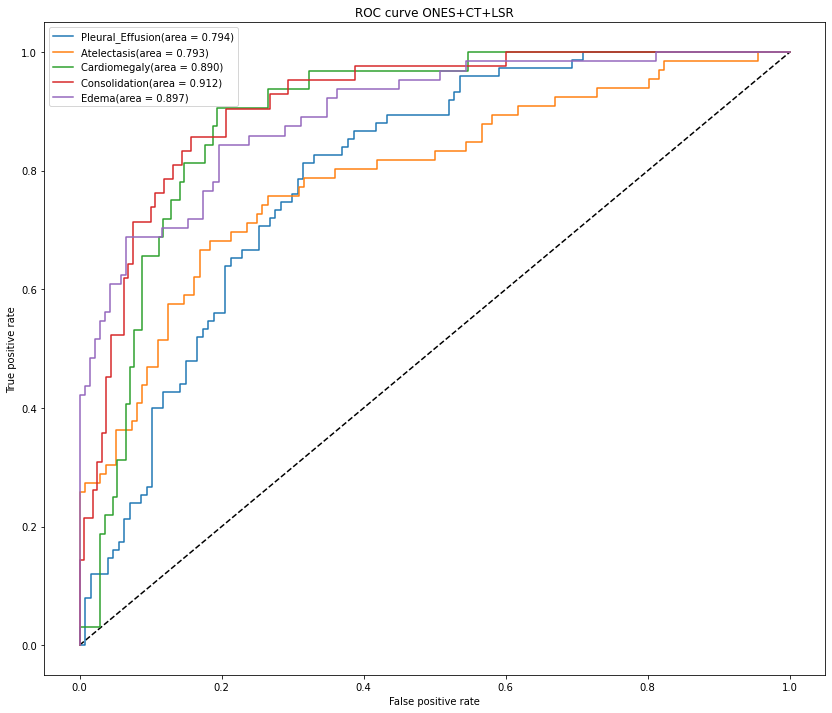

In [ ]:


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=df_flat.columns[1:][ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ONES+CT+LSR')
plt.legend(loc='best')
plt.show()



In [ ]:
# train_datagen_flat=ImageDataGenerator(
#     rescale=1./255,
#     horizontal_flip=True
# )

datagen=ImageDataGenerator(rescale=1./255.,
                           horizontal_flip=True,
                           validation_split=0.20)



In [ ]:
valid_datagen_flat=ImageDataGenerator(rescale=1./255,)

In [ ]:
train_data_flat=datagen.flow_from_directory(
    "/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/Paper_Dataset_Flat/Train_Flat",
    target_size=(224,224),
    subset="training",
    batch_size=64,
    class_mode="categorical"
)

Found 48579 images belonging to 14 classes.


In [ ]:
valid_data_flat=datagen.flow_from_directory(
    "/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/Paper_Dataset_Flat/Train_Flat",
    target_size=(224,224),
    subset="validation",
    batch_size=64,
    class_mode="categorical"
)

Found 12144 images belonging to 14 classes.


In [ ]:

model_train.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

In [ ]:


flat_history = model_train.fit(train_data_flat, 
          epochs=50,
          validation_data=valid_data_flat, 
          callbacks=callbacks_list)



Epoch 1/50
760/760 [==============================] - 14433s 19s/step - loss: 1.0808 - accuracy: 0.5519 - val_loss: 1.3832 - val_accuracy: 0.2948 - lr: 0.0010
Epoch 2/50
760/760 [==============================] - 357s 470ms/step - loss: 0.9806 - accuracy: 0.6096 - val_loss: 1.4592 - val_accuracy: 0.2782 - lr: 0.0010
Epoch 3/50
760/760 [==============================] - ETA: 0s - loss: 0.9506 - accuracy: 0.6221
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
760/760 [==============================] - 358s 471ms/step - loss: 0.9506 - accuracy: 0.6221 - val_loss: 1.3846 - val_accuracy: 0.2782 - lr: 0.0010
Epoch 4/50
760/760 [==============================] - 358s 471ms/step - loss: 0.8976 - accuracy: 0.6485 - val_loss: 1.3934 - val_accuracy: 0.2782 - lr: 3.0000e-04


SMote

In [ ]:
import datetime
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from imblearn.over_sampling import SMOTE

smote = SMOTE()

k.clear_session()
tf.set_random_seed(42)
np.random.seed(42)

currentDay = datetime.date.today()
now = datetime.datetime.now()
t = now.strftime("%H-%M-%S")

NAME = f'{currentDay}_{t}new_model_001.h5'

tboard = TensorBoard(log_dir=f'logs\\{NAME}',
                     update_freq="epoch",
                     histogram_freq=1,
                     write_grads=True,
                     write_graph=True,
                     )

# config
img_width = 224
img_height = 224
INPUT_DEPTH = 3
input_shape = (img_height, img_width, INPUT_DEPTH)
TRAIN_DATA_DIR = 'dataset/train/'
VALIDATION_DATA_DIR = 'dataset/validation/'
TESTING_DATA_DIR = 'dataset/test/'
MODEL_DIR = 'h5_Models/'
EPOCHS = 500
PATIENCE = 25
BATCH_SIZE = 2

MODEL_NAME = 'new_model_001.h5'

train_datagen = ImageDataGenerator(
    rescale=1/255,
    # zca_whitening=True,
    # zca_epsilon=0.1,
    # rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=(0.95, 0.95),
    # data_format='channels_last',
    horizontal_flip=True,
    # vertical_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    # color_mode='grayscale',
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    # color_mode='grayscale',
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

testing_generator = test_datagen.flow_from_directory(
    TESTING_DATA_DIR,
    # color_mode='grayscale',
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    )

X_train, y_train = next(train_generator)

print(X_train.shape)
print(y_train.shape)
X_train_smote, y_train_smote = smote.fit_sample(X_train.reshape(X_train.shape[0], -1), y_train.ravel())
print(X_train_smote.count)
X_train_smote = X_train_smote.reshape(X_train_smote.shape[0], 224, 224, 3)


1

# FLat New

In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import tensorflow as tf
import tensorflow.keras
import keras.backend as K

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from glob import glob
from PIL import Image
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/train.csv')

In [ ]:
# only frontal view of chest Xrays kept

# df=df.loc[df["Frontal/Lateral"]=="Frontal",:]
# df.shape

In [ ]:
df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

In [ ]:
import random
random.uniform(0,0.3)

0.16106260999672276

In [ ]:
def prepare_dataset(dataframe,policy,class_names):
    dataset_df = dataframe[dataframe['Frontal/Lateral'] == 'Frontal'] #take frontal pics only
    df = dataset_df.sample(frac=1., random_state=1)
    df.fillna(0, inplace=True) #fill the with zeros
    x_path, y_df = df["Path"].to_numpy(), df[class_names]
    class_ones = ['Atelectasis', 'Cardiomegaly']
    y = np.empty(y_df.shape, dtype=int)
    for i, (index, row) in enumerate(y_df.iterrows()):
        labels = []
        for cls in class_names:
            curr_val = row[cls]
            feat_val = 0
            if curr_val:
                curr_val = float(curr_val)
                if curr_val == 1:
                    feat_val = 1
                elif curr_val == -1:
                    if policy == "ones":
                        feat_val = 1
                    elif policy == "mixed_one":
                        feat_val = random.uniform(0.55,0.85)
                    elif policy == "mixed_zero":
                        feat_val = random.uniform(0,0.3)
                    elif policy == "zeroes":
                        feat_val = 0
                    elif policy == "mixed":
                        if cls in class_ones:
                            feat_val = 1
                        else:
                            feat_val = 0
                    else:
                        feat_val = 0
                else:
                    feat_val = 0
            else:
                feat_val = 0
            
            labels.append(feat_val)
            
        y[i] = labels
        
    return x_path,y

In [ ]:
class_names = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 
               'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 
               'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']
policy = ['ones','zeroes','mixed_zero','mixed_one']
x_path,labels = prepare_dataset(df,policy[-1],class_names)

In [ ]:
x_path.shape,labels.shape

((191027,), (191027, 14))

In [ ]:
# df
train_df = pd.DataFrame({'path':x_path})
df2 = pd.DataFrame(labels,columns=class_names)
train_df[list(df2.columns)]=df2 

In [ ]:
df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
train_df

,path,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient14619/study6/...,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,CheXpert-v1.0-small/train/patient14869/study2/...,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,CheXpert-v1.0-small/train/patient40881/study1/...,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,CheXpert-v1.0-small/train/patient24862/study3/...,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,CheXpert-v1.0-small/train/patient35268/study4/...,0,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191022,CheXpert-v1.0-small/train/patient22226/study2/...,1,0,0,0,0,0,0,0,0,0,0,0,0,1
191023,CheXpert-v1.0-small/train/patient33134/study1/...,0,0,0,0,0,0,0,0,0,0,0,0,0,1
191024,CheXpert-v1.0-small/train/patient15229/study6/...,0,0,0,0,0,0,0,0,1,0,0,0,0,1
191025,CheXpert-v1.0-small/train/patient01595/study10...,0,0,1,1,0,1,1,0,1,0,0,0,0,1


Support Devices               107170
Lung Opacity                   94211
Pleural Effusion               76899
Atelectasis                    59583
Edema                          49675
Cardiomegaly                   30092
Pneumothorax                   17693
No Finding                     16974
Consolidation                  12983
Enlarged Cardiomediastinum      9187
Fracture                        7436
Lung Lesion                     7040
Pneumonia                       4675
Pleural Other                   2505
dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd24b50b310>,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
  <a list of 14 Text major ticklabel objects>))

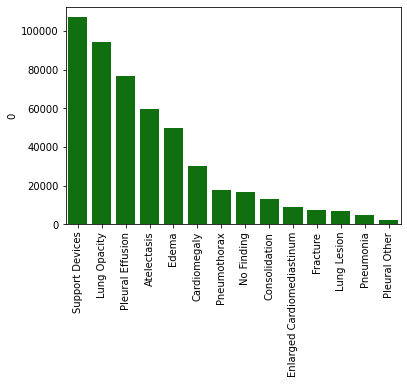

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
clean_labels = train_df[class_names].sum().sort_values(ascending= False) # get sorted value_count for clean labels
print(clean_labels) # view tabular results

# plot cases using seaborn barchart
clean_labels_df = clean_labels.to_frame() # convert to dataframe for plotting purposes
sns.barplot(x = clean_labels_df.index[::], y= 0, data = clean_labels_df[::], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

In [ ]:
IMG_SIZE = (224,224)
CHANNELS = 3

In [ ]:
base_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                           horizontal_flip=True,validation_split=0.2)

train_gen = base_gen.flow_from_dataframe(dataframe=train_df,
                                         directory=None,
                                         x_col='path',
                                         y_col=class_names,
                                         class_mode='raw',
                                         subset="training",
                                         target_size=IMG_SIZE,
                                         shuffle=True,
                                         # color_mode = 'grayscale',
                                         batch_size=64)

valid_gen = base_gen.flow_from_dataframe(dataframe=train_df,
                                         directory=None,
                                         x_col='path',
                                         y_col=class_names,
                                         subset="validation",
                                         class_mode='raw',
                                         target_size=IMG_SIZE,
                                         shuffle = True,
                                         # color_mode = 'grayscale',
                                         batch_size=64) 

In [ ]:
# t_x, t_y = next(train_gen)
# fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
# for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
#     c_ax.imshow(c_x[:,:,0])
#     c_ax.set_title(', '.join([n_class for n_class, n_score in zip(class_names, c_y) 
#                              if n_score>0.5]))
#     c_ax.axis('off')

In [ ]:
#model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# for layer in base_model.layers:
#     layer.trainable = False
x = base_model.output  
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(class_names), activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
# model.summary()

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
@tf.function
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost

In [ ]:
@tf.function
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

In [ ]:
early=tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=3,restore_best_weights=True)

learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list=[early, learning_rate_reduction]

In [ ]:
#optimizer = tf.optimizers.RMSProp(learning_rate=0.001)
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop'
)
model.compile(optimizer=optimizer, loss=macro_soft_f1, metrics=[macro_f1,'accuracy'])

In [ ]:
H = model.fit(train_gen,validation_data=valid_gen,epochs=20,callbacks=callbacks_list)

Epoch 1/20
2388/2388 [==============================] - 1093s 447ms/step - loss: 0.6666 - macro_f1: 0.3345 - accuracy: 0.2588 - val_loss: 0.6981 - val_macro_f1: 0.3017 - val_accuracy: 0.2716 - lr: 0.0010
Epoch 2/20
2388/2388 [==============================] - 1011s 423ms/step - loss: 0.6555 - macro_f1: 0.3451 - accuracy: 0.3283 - val_loss: 0.7004 - val_macro_f1: 0.2997 - val_accuracy: 0.3778 - lr: 0.0010
Epoch 3/20
2388/2388 [==============================] - ETA: 0s - loss: 0.6499 - macro_f1: 0.3507 - accuracy: 0.3468
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
2388/2388 [==============================] - 967s 405ms/step - loss: 0.6499 - macro_f1: 0.3507 - accuracy: 0.3468 - val_loss: 0.7500 - val_macro_f1: 0.2497 - val_accuracy: 0.3358 - lr: 0.0010
Epoch 4/20
2388/2388 [==============================] - 966s 404ms/step - loss: 0.6361 - macro_f1: 0.3647 - accuracy: 0.3658 - val_loss: 0.6379 - val_macro_f1: 0.3626 - val_accuracy: 0.3605 - lr: 3.0000e-04


In [ ]:
# def auc(y_true, y_pred):
#     auc = tf.keras.metrics.AUC(y_true, y_pred)[1]
#     K.get_session().run(tf.local_variables_initializer())
#     return auc

In [ ]:
import tensorflow as tf
import functools
from keras import backend as K

In [ ]:


model.compile(metrics=['accuracy',macro_f1,tf.keras.metrics.AUC(from_logits=True)], optimizer='adam', loss= macro_soft_f1)



In [ ]:
history = model.fit(train_gen,validation_data=valid_gen,epochs=50,callbacks=callbacks_list)

Epoch 1/50
2388/2388 [==============================] - 1112s 461ms/step - loss: 0.6145 - accuracy: 0.4289 - macro_f1: 0.3857 - auc: 0.8016 - val_loss: 0.8463 - val_accuracy: 0.0746 - val_macro_f1: 0.1515 - val_auc: 0.6828 - lr: 0.0010
Epoch 2/50
2388/2388 [==============================] - 1098s 460ms/step - loss: 0.6158 - accuracy: 0.4271 - macro_f1: 0.3846 - auc: 0.7994 - val_loss: 0.8165 - val_accuracy: 0.3892 - val_macro_f1: 0.1775 - val_auc: 0.6767 - lr: 0.0010
Epoch 3/50
2388/2388 [==============================] - 1099s 460ms/step - loss: 0.6114 - accuracy: 0.4365 - macro_f1: 0.3888 - auc: 0.7998 - val_loss: 0.8476 - val_accuracy: 0.3998 - val_macro_f1: 0.1521 - val_auc: 0.6796 - lr: 0.0010
Epoch 4/50
2388/2388 [==============================] - ETA: 0s - loss: 0.6122 - accuracy: 0.4309 - macro_f1: 0.3880 - auc: 0.7995
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
2388/2388 [==============================] - 1098s 460ms/step - loss: 0.6122 - accura

In [ ]:

model.save('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_flat_auc.h5')

In [ ]:
cd /content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/json

/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/json


In [ ]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)


In [ ]:
import json
  
# Opening JSON file
f = open('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/json/history.json',"r")
  
# returns JSON object as 
# a dictionary
history = json.load(f)

In [ ]:
history

{'accuracy': {'0': 0.4289042056,
  '1': 0.4270523787,
  '2': 0.4364554882,
  '3': 0.430893451,
  '4': 0.4455117583},
 'auc': {'0': 0.8015902638,
  '1': 0.7993812561,
  '2': 0.7997577786,
  '3': 0.799490869,
  '4': 0.8060979247},
 'loss': {'0': 0.6145310998,
  '1': 0.6158129573,
  '2': 0.6113924384,
  '3': 0.6122476459,
  '4': 0.5994037986},
 'lr': {'0': 0.001, '1': 0.001, '2': 0.001, '3': 0.001, '4': 0.0003},
 'macro_f1': {'0': 0.385733515,
  '1': 0.3845869899,
  '2': 0.3888463676,
  '3': 0.3879930377,
  '4': 0.4007921219},
 'val_accuracy': {'0': 0.0745975673,
  '1': 0.3892160654,
  '2': 0.3998167813,
  '3': 0.3998167813,
  '4': 0.0241067931},
 'val_auc': {'0': 0.6827574372,
  '1': 0.6766970158,
  '2': 0.6796110272,
  '3': 0.6710042357,
  '4': 0.4782291949},
 'val_loss': {'0': 0.846255064,
  '1': 0.8165152669,
  '2': 0.8476013541,
  '3': 0.8476215601,
  '4': 0.9316834211},
 'val_macro_f1': {'0': 0.1515035331,
  '1': 0.1774663329,
  '2': 0.1521028727,
  '3': 0.1509992331,
  '4': 0.05149

In [ ]:
list(history['val_accuracy'].values())

[0.0745975673, 0.3892160654, 0.3998167813, 0.3998167813, 0.0241067931]

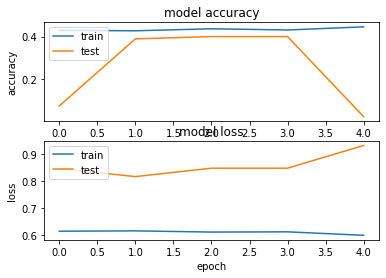

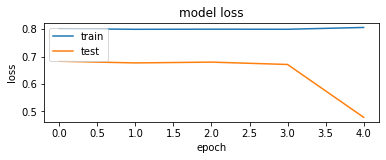

In [ ]:

plt.figure(1)    
# summarize history for accuracy     
plt.subplot(211)  
plt.plot(list(history['accuracy'].values()))  
plt.plot(list(history['val_accuracy'].values()))  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss    
plt.subplot(212)  
plt.plot(list(history['loss'].values()))  
plt.plot(list(history['val_loss'].values()))  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 


# summarize history for loss    
plt.subplot(212)  
plt.plot(list(history['auc'].values()))  
plt.plot(list(history['val_auc'].values()))  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/valid.csv')

In [ ]:
# only frontal view of chest Xrays kept

df=df.loc[df["Frontal/Lateral"]=="Frontal",:]
df.shape

(202, 19)

In [ ]:
class_names = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 
               'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 
               'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']
policy = ['ones','zeroes','mixed']
x_path,labels = prepare_dataset(df,policy[-1],class_names)

In [ ]:
# df
test_df = pd.DataFrame({'path':x_path})
df2 = pd.DataFrame(labels,columns=class_names)
test_df[list(df2.columns)]=df2 

Lung Opacity                  117
Enlarged Cardiomediastinum    105
Support Devices                99
Atelectasis                    75
Cardiomegaly                   66
Pleural Effusion               64
Edema                          42
Consolidation                  32
No Finding                     26
Pneumonia                       8
Pneumothorax                    7
Lung Lesion                     1
Pleural Other                   1
Fracture                        0
dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x7f38f22c58d0>,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
  <a list of 14 Text major ticklabel objects>))

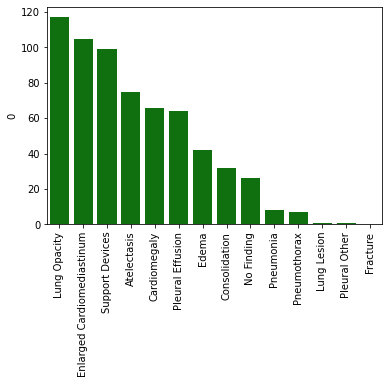

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
clean_labels = test_df[class_names].sum().sort_values(ascending= False) # get sorted value_count for clean labels
print(clean_labels) # view tabular results

# plot cases using seaborn barchart
clean_labels_df = clean_labels.to_frame() # convert to dataframe for plotting purposes
sns.barplot(x = clean_labels_df.index[::], y= 0, data = clean_labels_df[::], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

In [ ]:
test_df

,path,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64735/study1/...,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,CheXpert-v1.0-small/valid/patient64634/study1/...,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2,CheXpert-v1.0-small/valid/patient64712/study1/...,0,1,1,1,0,1,0,0,0,0,0,0,0,1
3,CheXpert-v1.0-small/valid/patient64662/study1/...,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,CheXpert-v1.0-small/valid/patient64578/study1/...,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,CheXpert-v1.0-small/valid/patient64672/study1/...,0,1,1,1,0,1,0,0,0,0,0,0,0,0
198,CheXpert-v1.0-small/valid/patient64676/study1/...,0,1,1,1,0,0,0,0,1,0,1,0,0,0
199,CheXpert-v1.0-small/valid/patient64611/study1/...,0,1,1,1,0,1,0,0,0,0,0,0,0,1
200,CheXpert-v1.0-small/valid/patient64679/study1/...,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
    test_generator = test_datagen.flow_from_dataframe(dataframe=valid_only_df, directory=data_path, 
                                                      target_size=(image_size,image_size),class_mode='categorical',
                                                      batch_size=1, shuffle=False, #classes = chexpert_targets,
                                                      x_col="Path", y_col="feature_string")
    

In [ ]:
base_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


test_gen = base_gen.flow_from_dataframe(dataframe=test_df,
                                         directory=None,
                                         x_col='path',
                                         y_col=class_names,
                                         class_mode='raw',
                                         target_size=IMG_SIZE,
                                         shuffle = False,
                                         # color_mode = 'grayscale',
                                         batch_size=1,
                                         ) 

Found 202 validated image filenames.


In [ ]:
# custom_objects={'loss': weighted_loss}     
model = tf.keras.models.load_model("/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_flat_auc.h5", custom_objects={'macro_soft_f1': macro_soft_f1,"macro_f1":macro_f1})

In [ ]:
test_gen.reset()
y_pred_keras = model.predict_generator(test_gen,verbose = 1,steps=test_gen.n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


202/202 [==============================] - 13s 10ms/step


In [ ]:
y_pred_keras.shape

(202, 14)

In [ ]:
np.array(test_df[class_names]).shape

(202, 14)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


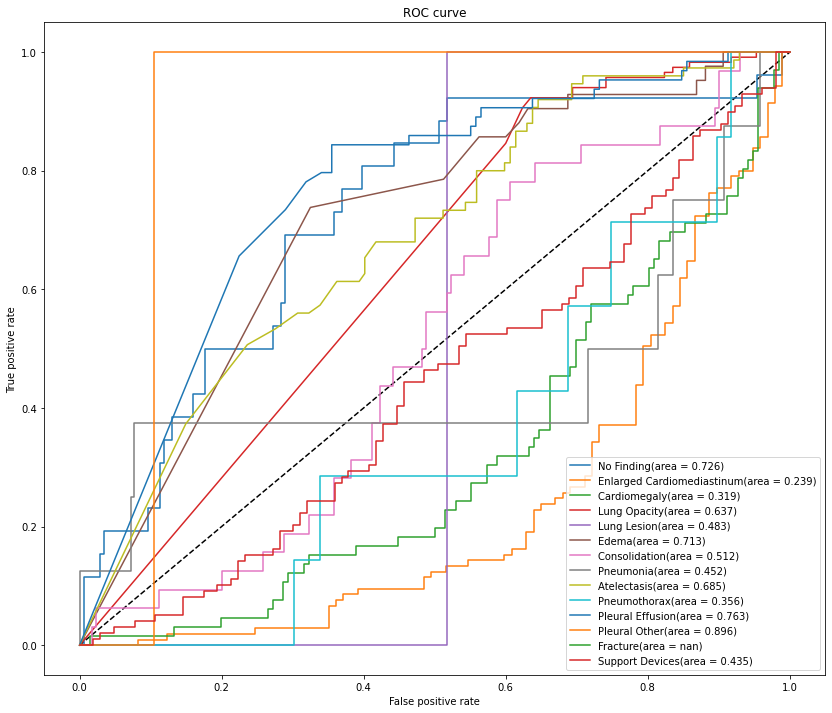

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(np.array(test_df[class_names])[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=class_names[ii] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
    

# Base_chexpert

In [ ]:
# https://www.kaggle.com/code/estebvac/chexpert-keras-base
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pathlib import Path

from sklearn.metrics import roc_auc_score

import numpy as np
import os
import cv2
import warnings

warnings.filterwarnings("ignore")

# IMPORT KERAS LIBRARY
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, Input, GlobalAveragePooling2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload

In [ ]:
full_train_df = pd.read_csv('/content/CheXpert-v1.0-small/train.csv')
full_valid_df = pd.read_csv('/content/CheXpert-v1.0-small/valid.csv')

In [ ]:
chexnet_targets = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

chexpert_targets = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

# chexpert_targets = ['No Finding',
#        'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
#        'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
#        'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
#        'Support Devices']

In [ ]:
full_train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
u_one_features = ['Atelectasis', 'Edema',]
u_zero_features = ['Cardiomegaly', 'Consolidation', 'Pleural Effusion']

In [ ]:
def feature_string(row):
    feature_list = []
    for feature in u_one_features:
        if row[feature] in [-1,1]:
            feature_list.append(feature)
            
    for feature in u_zero_features:
        if row[feature] == 1:
            feature_list.append(feature)
            
    return ';'.join(feature_list)
            
     

In [ ]:
full_train_df['train_valid'] = False
full_valid_df['train_valid'] = True

In [ ]:
full_train_df['patient'] = full_train_df.Path.str.split('/',3,True)[2]
full_train_df  ['study'] = full_train_df.Path.str.split('/',4,True)[3]

full_valid_df['patient'] = full_valid_df.Path.str.split('/',3,True)[2]
full_valid_df  ['study'] = full_valid_df.Path.str.split('/',4,True)[3]

In [ ]:
full_train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,train_valid,patient,study
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,False,patient00001,study1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,False,patient00002,study2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,False,patient00002,study1
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,False,patient00002,study1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,False,patient00003,study1


In [ ]:
full_df = pd.concat([full_train_df, full_valid_df])
full_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,train_valid,patient,study
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,False,patient00001,study1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,False,patient00002,study2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,False,patient00002,study1
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,False,patient00002,study1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,False,patient00003,study1


In [ ]:
full_df.shape

(223648, 22)

In [ ]:
full_df['feature_string'] = full_df.apply(feature_string,axis = 1).fillna('')
full_df['feature_string'] =full_df['feature_string'] .apply(lambda x:x.split(";"))
full_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,train_valid,patient,study,feature_string
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,1.0,False,patient00001,study1,[]
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,-1.0,NaN,-1.0,NaN,1.0,NaN,False,patient00002,study2,"[Atelectasis, Edema]"
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,False,patient00002,study1,[]
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,False,patient00002,study1,[]
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,False,patient00003,study1,[Edema]


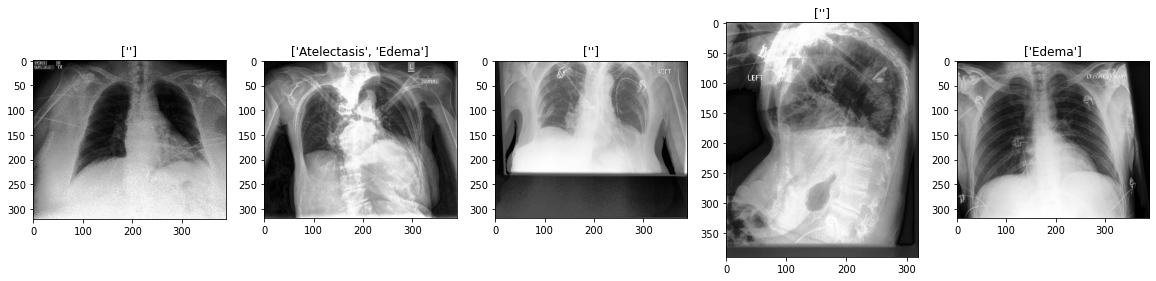

In [ ]:
#get the first 5 whale images
paths =  full_df.Path[:5]
labels = full_df.feature_string[:5]

fig, m_axs = plt.subplots(1, len(labels), figsize = (20, 10))
#show the images and label them
for ii, c_ax in enumerate(m_axs):
    c_ax.imshow(cv2.imread(os.path.join(paths[ii])))
    c_ax.set_title(labels[ii])

([<matplotlib.axis.XTick at 0x7f14d63e1f90>,
 [Text(0, 0, ''),
  Text(0, 0, 'Atelectasis'),
  Text(0, 0, 'Cardiomegaly'),
  Text(0, 0, 'Consolidation'),
  Text(0, 0, 'Edema'),
  Text(0, 0, 'Pleural Effusion')])

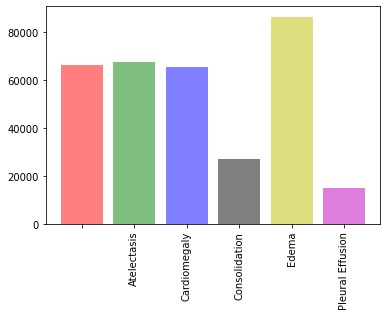

In [ ]:
from collections import Counter

labels_count = Counter(label for chexpert_targets in full_df['feature_string'] for label in chexpert_targets)
#plt.bar(chexpert_targets, labels_count.values(), align='center', alpha=0.5)
#plt.show
x_pos = np.arange(len(labels_count.values()))
#Plot the data:
my_colors = 'rgbkymc'
lbls = list.copy(chexpert_targets)
lbls.insert(0,'')
plt.bar(x_pos, labels_count.values(), align='center', alpha=0.5 , color=my_colors)
plt.xticks(x_pos, lbls, rotation='vertical')

In [ ]:
sample_perc = 0.00
train_only_df = full_df[~full_df.train_valid]
valid_only_df = full_df[full_df.train_valid]
unique_patients = train_only_df.patient.unique()
mask = np.random.rand(len(unique_patients)) <= sample_perc
sample_patients = unique_patients[mask]

dev_df = train_only_df[full_train_df.patient.isin(sample_patients)]
train_df = train_only_df[~full_train_df.patient.isin(sample_patients)]

print(valid_only_df.Path.size)
print(train_df.Path.size)

234
223414


In [ ]:
datagen=image.ImageDataGenerator(rescale=1./255, 
                                 featurewise_center=True,
                                 featurewise_std_normalization=True,
                                 rotation_range=5,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 validation_split = 0.1)
test_datagen=image.ImageDataGenerator(rescale=1./255)

In [ ]:
def generate_datasets(image_size = 224):

    train_generator=datagen.flow_from_dataframe(dataframe=train_df, directory=None, 
                                                x_col="Path", y_col="feature_string", has_ext=True, seed = 42, #classes = chexpert_targets,
                                                class_mode="categorical", target_size=(image_size,image_size), batch_size=32, subset = "training")

    validation_generator = datagen.flow_from_dataframe(dataframe=train_df, directory=None, 
                                                       x_col="Path", y_col="feature_string", has_ext=True, seed = 42, #classes = chexpert_targets,
                                                       class_mode="categorical", target_size=(image_size,image_size), batch_size=32, subset = "validation")

    test_generator = test_datagen.flow_from_dataframe(dataframe=valid_only_df, directory=None, 
                                                      target_size=(image_size,image_size),class_mode='categorical',
                                                      batch_size=1, shuffle=False, #classes = chexpert_targets,
                                                      x_col="Path", y_col="feature_string")
    
    return [train_generator,validation_generator,test_generator]

In [ ]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [ ]:
!pip install libauc

In [ ]:
from libauc.losses import AUCMLoss, CrossEntropyLoss
from libauc.optimizers import PESG, Adam

In [ ]:
def build_model(image_size = 224, load_previous_weights = True, freeze_cnn = False):
    base_model = DenseNet121(include_top= False, input_shape=(image_size,image_size,3), weights='imagenet')
    # base_model = tf.keras.applications.EfficientNetB0(include_top= False, input_shape=(image_size,image_size,3), weights='imagenet')

    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D(input_shape=(1024,1,1))(x)
    # Add a flattern layer 
    x = Dense(2048, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    # Add a fully-connected layer
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    # and a logistic layer --  we have 5 classes
    predictions = Dense(6, activation='sigmoid')(x)
    
    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # Recover previously trained weights
    if load_previous_weights:
        try:
            model.load_weights('../input/chexpert-keras-base/weights.hdf5')
            print('Weights successfuly loaded')
        except:
            print('Weights not loaded')

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    if freeze_cnn:
        for layer in base_model.layers:
            layer.trainable = False
        
    # compile the model (should be done *after* setting layers to non-trainable)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(from_logits=True)])
        
    return model

In [ ]:
def train_model(model , datasets, epochs=1, image_size = 224):
    
    checkpointer = ModelCheckpoint(filepath='weights.hdf5', 
                                   verbose=1, save_best_only=True)
    
    train_generator,validation_generator,test_generator = datasets
    
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
    print(STEP_SIZE_TRAIN)
    print(STEP_SIZE_VALID)

    history = model.fit_generator(generator=train_generator,
                        steps_per_epoch=STEP_SIZE_TRAIN,
                        validation_data=validation_generator,
                        validation_steps=STEP_SIZE_VALID,
                        epochs=epochs, callbacks = [checkpointer])
    return history

In [ ]:
image_size_input = 224
model = build_model(image_size = image_size_input)

In [ ]:
model.summary()

In [ ]:
datasets = generate_datasets(image_size = image_size_input)


In [ ]:
train_generator,validation_generator,test_generator = datasets

In [ ]:
history = train_model(model , datasets, epochs=3, image_size = image_size_input)
history.history

6283
698
Epoch 1/3
6283/6283 [==============================] - ETA: 0s - loss: 0.4603 - accuracy: 0.3508 - auc_3: 0.7850
Epoch 1: val_loss improved from inf to 0.50192, saving model to weights.hdf5
6283/6283 [==============================] - 2760s 437ms/step - loss: 0.4603 - accuracy: 0.3508 - auc_3: 0.7850 - val_loss: 0.5019 - val_accuracy: 0.4033 - val_auc_3: 0.7852
Epoch 2/3
6283/6283 [==============================] - ETA: 0s - loss: 0.4300 - accuracy: 0.3770 - auc_3: 0.8158
Epoch 2: val_loss improved from 0.50192 to 0.44192, saving model to weights.hdf5
6283/6283 [==============================] - 2705s 431ms/step - loss: 0.4300 - accuracy: 0.3770 - auc_3: 0.8158 - val_loss: 0.4419 - val_accuracy: 0.3400 - val_auc_3: 0.8022
Epoch 3/3
6283/6283 [==============================] - ETA: 0s - loss: 0.4163 - accuracy: 0.3913 - auc_3: 0.8293
Epoch 3: val_loss did not improve from 0.44192
6283/6283 [==============================] - 2666s 424ms/step - loss: 0.4163 - accuracy: 0.3913 - a

{'accuracy': [0.35082894563674927, 0.3770225942134857, 0.391263484954834],
 'auc_3': [0.7850342392921448, 0.8157938718795776, 0.8293061256408691],
 'loss': [0.4602609872817993, 0.42999356985092163, 0.4163154363632202],
 'val_accuracy': [0.4032503664493561, 0.33998924493789673, 0.3408398926258087],
 'val_auc_3': [0.7851868867874146, 0.8021610379219055, 0.8031509518623352],
 'val_loss': [0.5019155740737915, 0.4419233500957489, 10.14051342010498]}

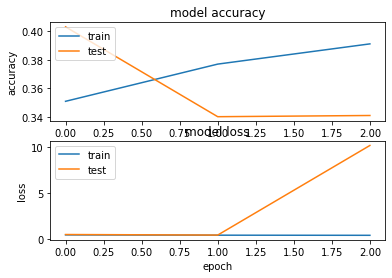

In [ ]:
plt.figure(1)    
# summarize history for accuracy     
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss    
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
test = pd.Series(test_generator.labels)
mlb = MultiLabelBinarizer()
y_labels = mlb.fit_transform(test)

In [ ]:
test_generator.reset()
y_pred_keras = model.predict_generator(test_generator,verbose = 1,steps=test_generator.n)

234/234 [==============================] - 8s 17ms/step


In [ ]:
y_pred_keras.shape

(234, 6)

In [ ]:
y_labels.shape

(234, 6)

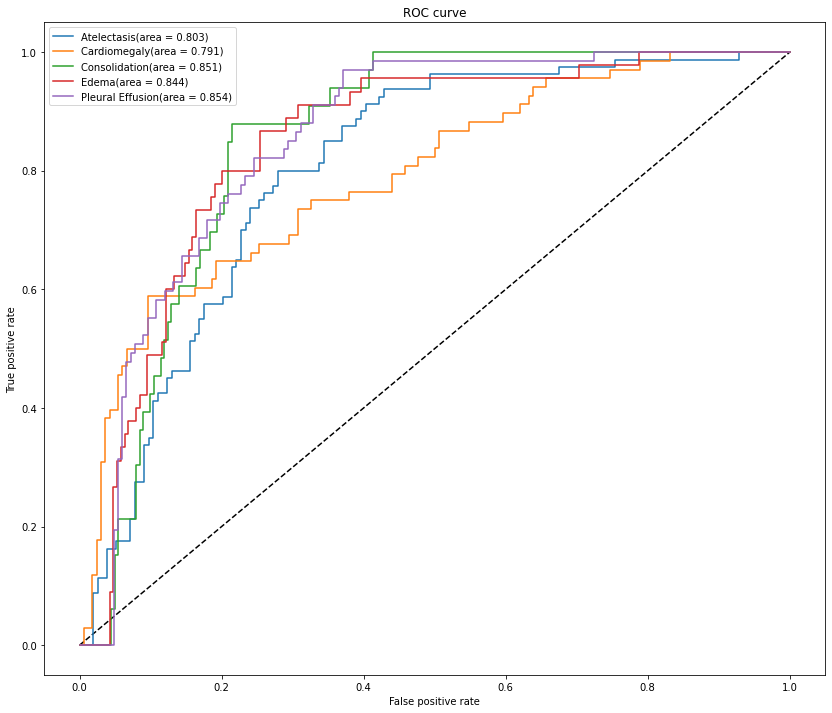

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=chexpert_targets[ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
    

In [ ]:
model.save('/content/drive/Shareddrives/Lenek_Workspace3/ShivamSaket/Data/My_models/modelsNweights/model_flat_auc_kaggle.h5')